___
# Ciência dos Dados - PROJETO 1

GABRIEL MOURA ALMEIDA

Análise do uso de aparelhos eletrônicos em domicílios de acordo com as faixas de renda mensais, no estado de São Paulo.

___
## Introdução

Acesso à internet e TV

Principal pergunta: •	Qual dos 3 aparelhos eletrônicos: televisão, microcomputadores e celulares aparecem mais nos domicílios do estado de São Paulo?

Pretendo analisar e comparar o uso de aparelhos eletrônicos como: computadores, celulares e televisão em diferentes faixas de renda mensal no estado de São Paulo.

Variáveis de Interesse:
- Rendimento mensal domiciliar per capita
- Tem telefone móvel celular
- Tem televisão em cores
- Microcomputador é utilizado para acessar a Internet
- Existência de morador de 0 a 17 anos de idade


Filtro de Tipos de Domicílios
- Unidade da Federação
- Total de moradores
- Condição de ocupação do domicílio
- Código de situação censitária


___
## Análise e Resultados

In [461]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
matplotlib.style.use('ggplot')

In [462]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())


Esperamos trabalhar no diretório
C:\Users\Gabriel Moura\Documents\Insper\2 Semestre\Ciência dos Dados\Projeto 1\Ciencia-dos-Dados


Sim    0.753158
Não    0.246842
Name: Celular, dtype: float64


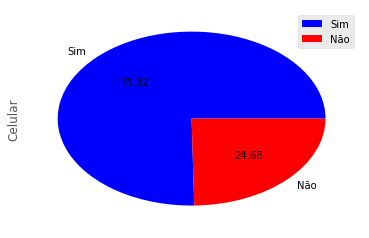

In [463]:
# Projeto1CD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#dados = pd.read_csv("PNAD/PNAD DOM2009/DOM2009csv/DOM2009.csv")
#dados = pd.read_table("PNAD/PNAD DOM2009/DOM2009csv/DOM2009.csv", encoding="windows-1252", sep=",")
dados = pd.read_csv('PNAD/PNAD DOM2009/DOM2009csv/DOM2009.csv',sep=',')
dados = dados.rename(columns={"UF":"Estados","V4622":"Salario", "V0207":"Condição","V2020":"Celular","V4621":"Renda","V0226":"Televisão","V0232":"Microcomputador","V0105":"Total de moradores","V4105":"CódigoCensitário","V2123":"Menor"})
dados_resumidos = dados[dados.Estados == 35] #filtragem para São Paulo 

dados_resumidos = dados_resumidos.ix[:, ["Celular","Salario","Televisão","Microcomputador","Renda","Total de moradores","CódigoCensitário","Menor"]]
#dados_resumidos.Condição = dados_resumidos.Condição.astype('category') 
dados_resumidos.Celular = dados_resumidos.Celular.astype('category')
dados_resumidos.Televisão = dados_resumidos.Televisão.astype('category')
dados_resumidos.Microcomputador = dados_resumidos.Microcomputador.astype('category')
dados_resumidos.CódigoCensitário= dados_resumidos.CódigoCensitário.astype('category')
dados_resumidos.Menor = dados_resumidos.Menor.astype('category')
dados_resumidos.Salario = dados_resumidos.Salario.astype('category')
#dados_resumidos.Condição.cat.categories = ('Proprio Pago', 'Proprio Pagando','Alugado','Cedido por empregador','Cedido de outra forma','Outro')
dados_resumidos.Celular.cat.categories = ('Sim', 'Não')
dados_resumidos.Televisão.cat.categories = ('Sim', 'Não')
dados_resumidos.Microcomputador.cat.categories = ('Sim', 'Não')
dados_resumidos.CódigoCensitário.cat.categories = ('Urbana1','Urbana2','Urbana3','Rural1','Rural2','Rural3','Rural4')
dados_resumidos.Menor.cat.categories = ('Sim','Não')
dados_resumidos.Salario.cat.categories = ("0","Até 1/4 de salário mínimo","Mais de ¼ até ½ salário mínimo","Mais de ½ até 1 salário mínimo","Mais de 1 até 2 salários mínimos","Mais de 2 até 3 salários mínimos","Mais de 3 até 5 salários mínimos","Mais de 5 salários mínimos","N")
#dados_resumidos= dados_resumidos[dados_resumidos.Condição.notnull()]
dados_resumidos= dados_resumidos[dados_resumidos.Microcomputador.notnull()]
dados_resumidos= dados_resumidos[dados_resumidos.Celular.notnull()]
dados_resumidos= dados_resumidos[dados_resumidos.Televisão.notnull()]
dados_resumidos= dados_resumidos[dados_resumidos.Menor.notnull()]


dfc = dados_resumidos.Celular.value_counts(True)
print(dfc)
dfc.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)






Sim    0.991254
Não    0.008746
Name: Televisão, dtype: float64


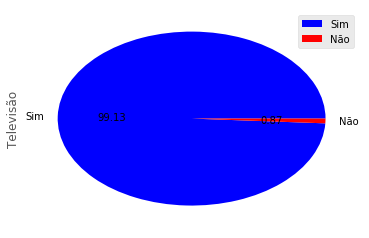

In [464]:
dfc1 = dados_resumidos.Televisão.value_counts(True)
print(dfc1)
dfc1.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

Sim    735
Não    294
Name: Microcomputador, dtype: int64


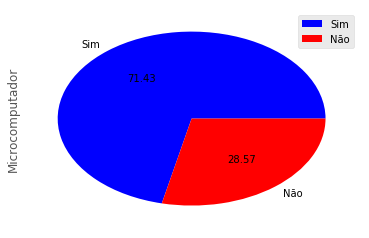

In [465]:
dfc2 = dados_resumidos.Microcomputador.value_counts()
print(dfc2)
dfc2.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

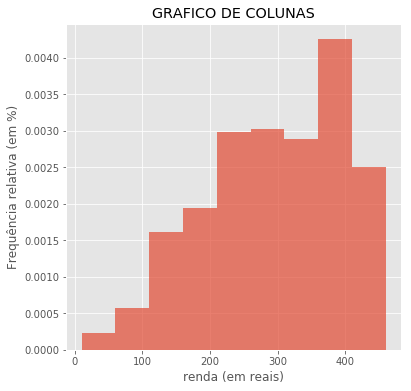

In [466]:
from numpy import zeros_like
dados_resumidos.Renda.describe()
faixa = range(10,500,50)
Renda_cat = pd.cut(dados_resumidos.Renda, bins=faixa)
Renda_cat.value_counts(sort=False, normalize=True)*100
plot = dados_resumidos.Renda.plot.hist(bins=faixa,title='GRAFICO DE COLUNAS', weights=zeros_like(dados_resumidos.Renda)+1./dados_resumidos.Renda.size*100, figsize=(6, 6), alpha=0.7, normed=1)
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda (em reais)')


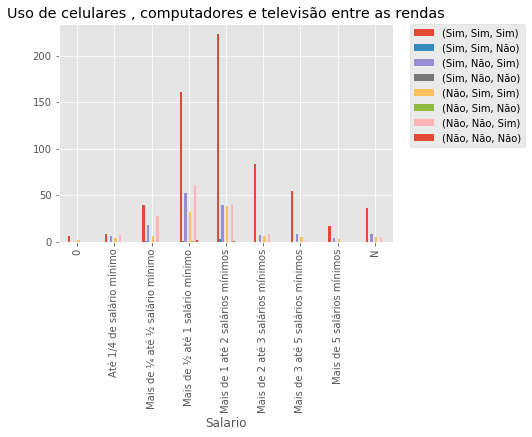

In [467]:
dfc3 = dados_resumidos.Salario.value_counts()
graficom = pd.crosstab(dados_resumidos.Salario,(dados_resumidos.Celular,dados_resumidos.Microcomputador, dados_resumidos.Televisão))
graficom.plot.bar(title="Uso de celulares , computadores e televisão entre as rendas").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [468]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)
ct3 = pd.crosstab(dados_resumidos.Microcomputador,dados_resumidos.Salario,margins=True,rownames=['Computador'],colnames=['Salarios']).apply(percConvert, axis=0)


In [469]:
ct3


Salarios,0,Até 1/4 de salário mínimo,Mais de ¼ até ½ salário mínimo,Mais de ½ até 1 salário mínimo,Mais de 1 até 2 salários mínimos,Mais de 2 até 3 salários mínimos,Mais de 3 até 5 salários mínimos,Mais de 5 salários mínimos,N,All
Computador,,,,,,,,,,
Sim,100.0,48.0,50.0,63.0,77.0,86.0,87.0,83.0,76.0,71.0
Não,0.0,52.0,50.0,37.0,23.0,14.0,13.0,17.0,24.0,29.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


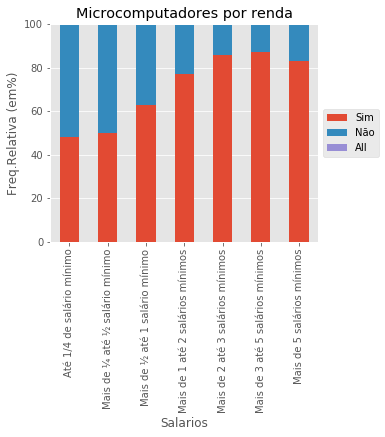

In [470]:
ct3 = ct3.iloc[:,1:8]
plot = ct3.T.plot(kind='bar', stacked=True,title='Microcomputadores por renda')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

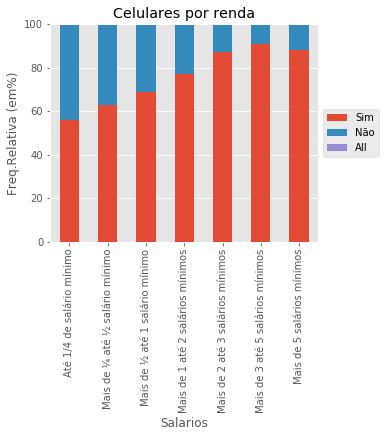

In [471]:
ct1 = pd.crosstab(dados_resumidos.Celular,dados_resumidos.Salario,margins=True,rownames=['Celular'],colnames=['Salarios']).apply(percConvert, axis=0)
ct1 = ct1.iloc[:,1:8]
plot = ct1.T.plot(kind='bar', stacked=True,title='Celulares por renda')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

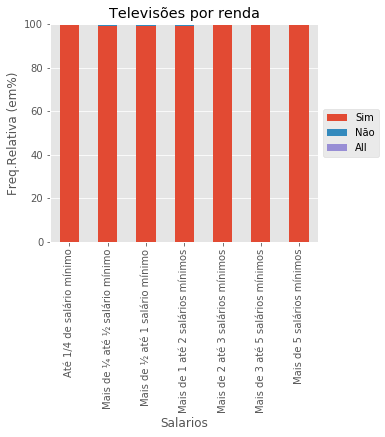

In [472]:
ct2 = pd.crosstab(dados_resumidos.Televisão,dados_resumidos.Salario,margins=True,rownames=['Telvisão'],colnames=['Salarios']).apply(percConvert, axis=0)
ct2 = ct2.iloc[:,1:8]
plot = ct2.T.plot(kind='bar', stacked=True,title='Televisões por renda')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [473]:
dados_resumidos

,Celular,Salario,Televisão,Microcomputador,Renda,Total de moradores,CódigoCensitário,Menor
94204,Sim,N,Sim,Sim,1.000000e+12,4.0,Urbana1,Não
94207,Sim,Mais de 2 até 3 salários mínimos,Sim,Não,1.350000e+03,2.0,Urbana1,Não
94215,Sim,Mais de 2 até 3 salários mínimos,Sim,Sim,1.075000e+03,4.0,Urbana1,Não
94217,Não,Mais de 3 até 5 salários mínimos,Sim,Sim,1.500000e+03,4.0,Urbana1,Sim
94228,Sim,Mais de 3 até 5 salários mínimos,Sim,Sim,1.500000e+03,3.0,Urbana1,Sim
94230,Sim,Mais de 1 até 2 salários mínimos,Sim,Sim,5.750000e+02,4.0,Urbana1,Sim
94234,Sim,N,Sim,Sim,1.000000e+12,3.0,Urbana1,Sim
94239,Sim,Mais de 1 até 2 salários mínimos,Sim,Sim,6.250000e+02,4.0,Urbana1,Sim
94241,Sim,Mais de 1 até 2 salários mínimos,Sim,Sim,6.500000e+02,2.0,Urbana1,Não
94256,Sim,Mais de ½ até 1 salário mínimo,Sim,Sim,4.000000e+02,3.0,Urbana1,Sim


___
## Conclusão 

Descreva aqui suas conclusões!